#  DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/anuragchaubey/customer-segmentation/data/OnlineRetail.csv")

In [3]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
62511,541506,21035,SET/2 RED RETROSPOT TEA TOWELS,1,1/18/2011 16:05,5.79,NaN,United Kingdom
188725,553057,20726,LUNCH BAG WOODLAND,10,5/13/2011 10:41,1.65,16161.0,United Kingdom
499677,578683,20975,12 PENCILS SMALL TUBE RED RETROSPOT,24,11/25/2011 8:55,0.65,15134.0,United Kingdom
358682,568160,23393,HOME SWEET HOME CUSHION COVER,4,9/25/2011 12:25,3.75,17498.0,United Kingdom
504728,578993,23498,CLASSIC BICYCLE CLIPS,1,11/27/2011 15:38,1.45,15987.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


dealing with missing data

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# percentage of missing values
(df.isnull().sum() / len(df)) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# calculation of percentage of missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
missing_df

,Missing Values,Percentage (%)
CustomerID,135080,24.926694
Description,1454,0.268311


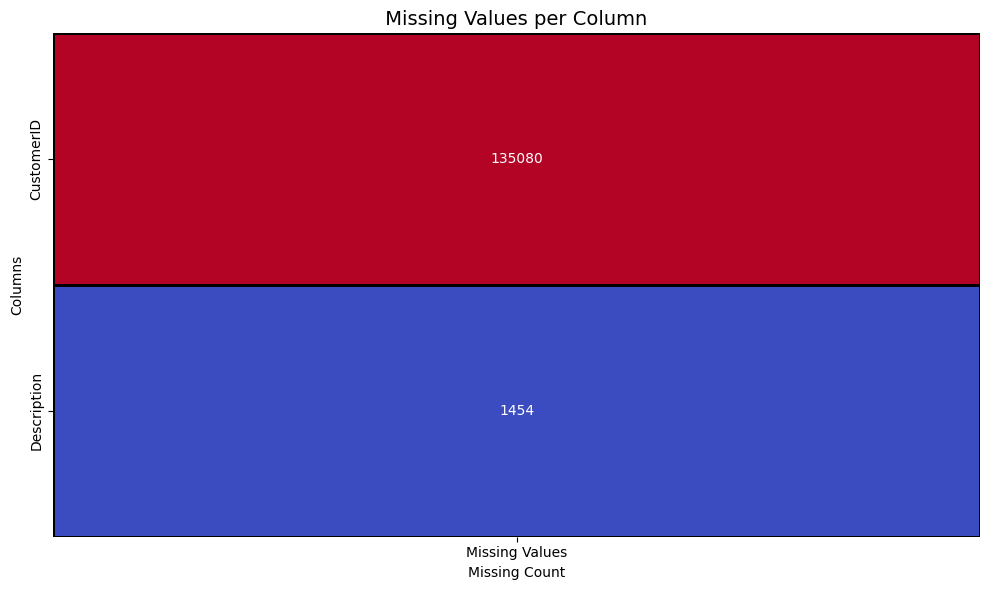

In [10]:
# visual analysis of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_df[['Missing Values']], annot=True, fmt='g', cmap='coolwarm', 
            cbar=False, 
            linewidths=1,
            linecolor='black'
)

plt.title(" Missing Values per Column ", fontsize=14)
plt.ylabel("Columns")
plt.xlabel("Missing Count")
plt.tight_layout()
plt.show()

In [11]:
# customer id column has >20% missing values (remove)
df = df.dropna(subset=['CustomerID'])

In [12]:
# fill missing values in desccreption with placeholder
df['Description'] = df['Description'].fillna("Unknown")

In [13]:
# cross verification of null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

fix data types of all columns 

In [14]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(int)

# convert invoice date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [16]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
# check the cancelled invoices
df[df['InvoiceNo'].str.startswith('C')].head()
df[df['InvoiceNo'].str.startswith('C')].value_counts()

# remove all the values for cancelled invoice
df = df[~df['InvoiceNo'].str.startswith('C')]

In [18]:
# remove quantity and unitprice with invalid values
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

create a new column for total amount

In [19]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [20]:
df[['Quantity', 'UnitPrice', 'TotalAmount']].head()

,Quantity,UnitPrice,TotalAmount
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [21]:
# check for 0 amount
df[df['TotalAmount']==0]

df = df[df['TotalAmount']>0]

final check for the cleaning process

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [23]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [24]:
df.shape

(397884, 9)

In [ ]:
# save cleaned data
df.to_csv("cleaned_data.csv",index=False)

# exploratory data analysis

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv("/Users/anuragchaubey/customer-segmentation/data/cleaned_data.csv")
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
253910,567944,22144,CHRISTMAS CRAFT LITTLE FRIENDS,3,2011-09-22 19:54:00,2.10,14562,United Kingdom,6.30
35049,541206,22345,PARTY PIZZA DISH BLUE POLKADOT,24,2011-01-14 12:24:00,0.21,14646,Netherlands,5.04
148898,555562,22221,CAKE STAND LOVEBIRD 2 TIER PINK,1,2011-06-05 14:45:00,9.95,17841,United Kingdom,9.95
303331,572528,21790,VINTAGE SNAP CARDS,2,2011-10-24 15:43:00,0.85,13176,United Kingdom,1.70
396402,581414,23371,SET 36 COLOUR PENCILS SPACEBOY,1,2011-12-08 14:39:00,1.25,14730,United Kingdom,1.25


In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [21]:
print("shape of the dataset : ",df.shape)

shape of the dataset :  (397884, 9)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


In [23]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
count,397884.000000,397884,397884,397884.000000,397884,397884.000000,397884.000000,397884,397884.000000
unique,NaN,3665,3877,NaN,NaN,NaN,NaN,37,NaN
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,NaN,2035,2028,NaN,NaN,NaN,NaN,354321,NaN
mean,560616.934451,NaN,NaN,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,NaN,22.397000
min,536365.000000,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN,0.001000
25%,549234.000000,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,NaN,4.680000
50%,561893.000000,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,NaN,11.800000
75%,572090.000000,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,NaN,19.800000
max,581587.000000,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN,168469.600000


In [24]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(5192)

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

np.int64(0)

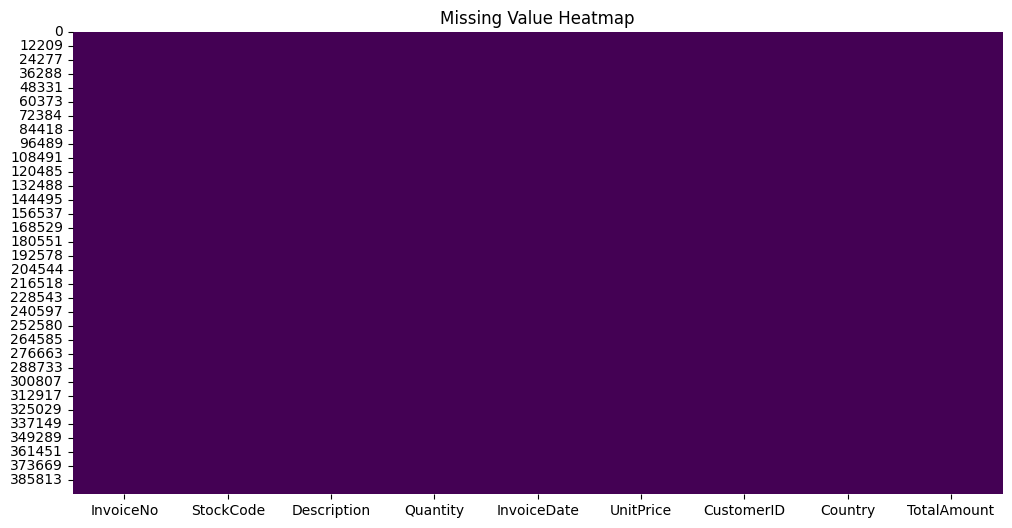

In [28]:
# current missing value heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [30]:
df['CustomerID'] = df['CustomerID'].astype('str')  # or 'category'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int64         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   TotalAmount  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


- Dataset contains 397884 rows and 9 columns
- Data types are correct (`InvoiceDate` is datetime, `CustomerID` is int)
- No null values found after cleaning
- No duplicate rows present
- All columns look logically consistent and ready for further analysis

# customerID detailed analysis

In [32]:
# total unique customers
df['CustomerID'].nunique()

4338

In [33]:
# top 10 customers on the basis of spending
df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalAmount, dtype: float64

In [ ]:
# orders per customer
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)


CustomerID
12748    209
14911    201
17841    124
13089     97
14606     93
15311     91
12971     86
14646     73
16029     63
13408     62
Name: InvoiceNo, dtype: int64

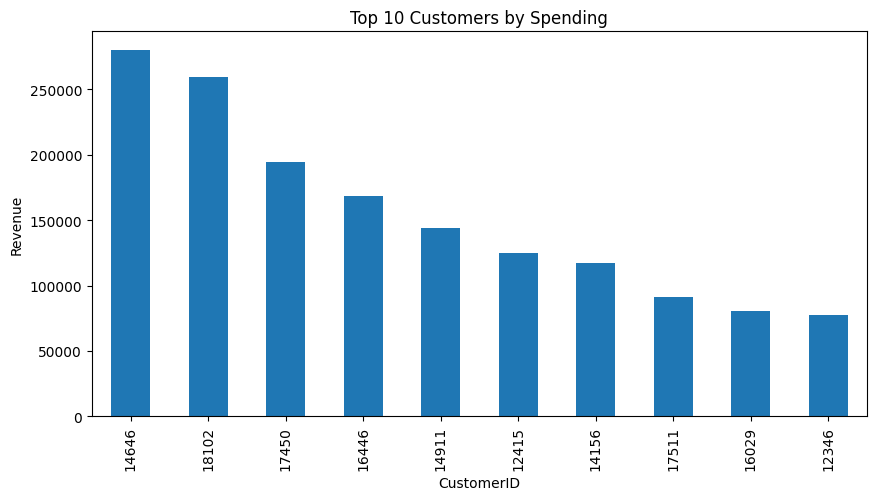

In [35]:
# top 10 customers by spending
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), title='Top 10 Customers by Spending')
plt.ylabel("Revenue")
plt.show()

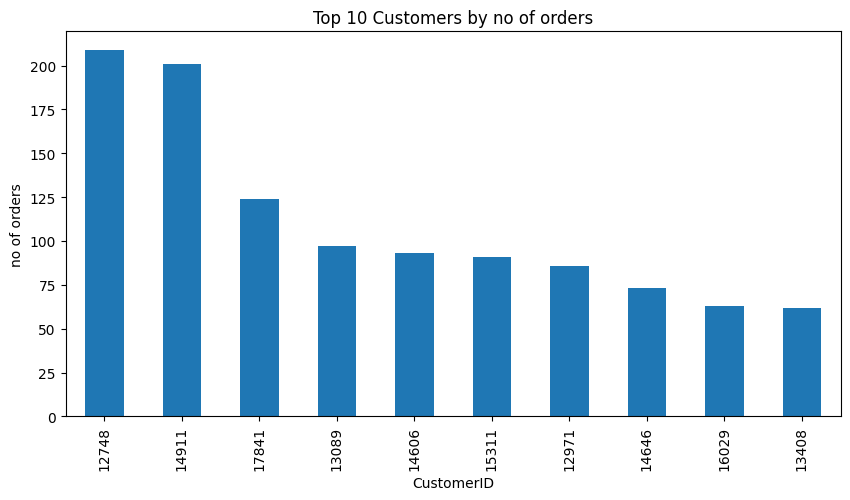

In [36]:
# top 10 customers by order
top_customers_order = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
top_customers_order.plot(kind='bar', figsize=(10,5), title='Top 10 Customers by no of orders')
plt.ylabel("no of orders")
plt.show()

In [37]:
# revenue percentage of top 10 customers

total_revenue = df['TotalAmount'].sum()
top_10 = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_10_percent = (top_10.sum() / total_revenue) * 100
print(f"Top 10 customers contribute {top_10_percent:.2f}% of total revenue.")

Top 10 customers contribute 17.30% of total revenue.


In [ ]:
# orders per customer analysis

order_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
one_time_buyers = (order_per_customer==1).sum()
low_freq_buyers = (order_per_customer<=2).sum()
total_customers = df['CustomerID'].nunique()

print(f"Customers with only 1 order: {one_time_buyers} ({(one_time_buyers/total_customers)*100:.2f}%)")
print(f"Customers with <=2 orders: {low_freq_buyers} ({(low_freq_buyers/total_customers)*100:.2f}%)")

Customers with only 1 order: 1493 (34.42%)
Customers with <=2 orders: 2328 (53.67%)


##  Customer Behavior Insights
- Total Unique Customers: 4338
- Top 10 customers contribute 17.30% of total revenue ✅
- 1493 customers (34.42%) have made only 1 purchase
- Around 54% customers have ordered 1–2 times only  
  → Indicates long-tail customer base and retention opportunity

## univariate analysis (InvoiceNo)

In [51]:
# basic invoiceno overview
print("Total rows        :", df.shape[0])
print("Unique Invoices   :", df['InvoiceNo'].nunique())
print("Sample InvoiceNos :", df['InvoiceNo'].unique()[:5])

Total rows        : 392692
Unique Invoices   : 18532
Sample InvoiceNos : [536365 536366 536367 536368 536369]


In [53]:
df['InvoiceNo'].dtypes

dtype('int64')

In [54]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [55]:
# total no of cancelled invoices
cancelled = df['InvoiceNo'].str.startswith('C')
print("Cancelled Invoices Count:", cancelled.sum())
print("Cancelled Invoices Sample:", df[cancelled]['InvoiceNo'].unique()[:5])

Cancelled Invoices Count: 0
Cancelled Invoices Sample: []


In [56]:
df['InvoiceNo'].str.len().value_counts()

InvoiceNo
6    392692
Name: count, dtype: int64

/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_1232/1935761810.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_invoices = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


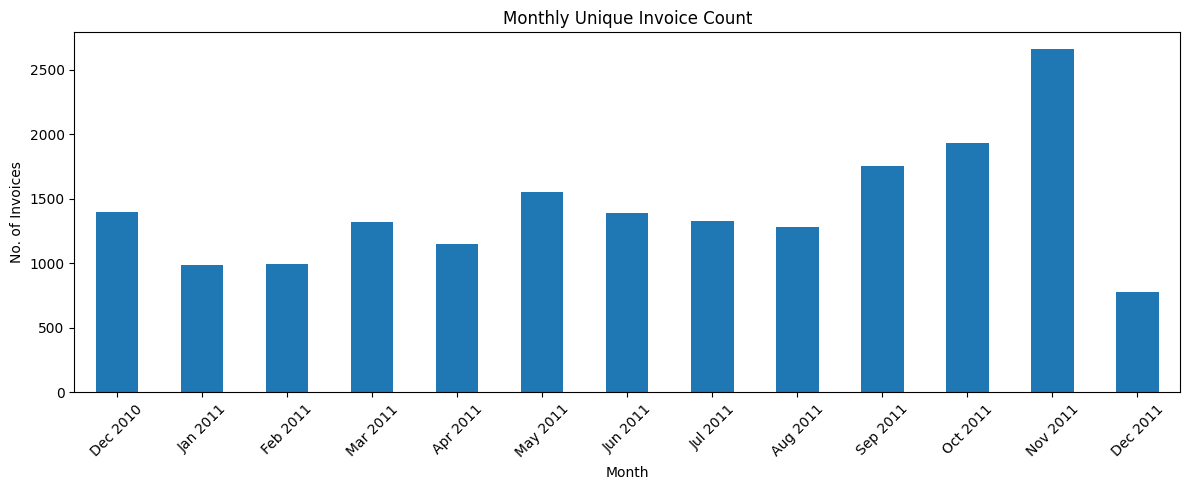

In [ ]:
# visualizing invoices per month

monthly_invoices = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_invoices.index = monthly_invoices.index.strftime('%b %Y') 
monthly_invoices.plot(kind='bar', figsize=(12,5), title="Monthly Unique Invoice Count")
plt.ylabel("No. of Invoices")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
# high product invoices

invoice_counts = df['InvoiceNo'].value_counts()
high_product_invoices = invoice_counts[invoice_counts >= 50]
print(f"Invoices with 50+ items: {len(high_product_invoices)}")
high_product_invoices.head()

Invoices with 50+ items: 1650


InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
Name: count, dtype: int64

In [58]:
# duplicate invoice check
invoice_counts = df['InvoiceNo'].value_counts()
invoice_counts.describe()


count    18532.000000
mean        21.189942
std         24.348782
min          1.000000
25%          6.000000
50%         15.000000
75%         27.000000
max        542.000000
Name: count, dtype: float64

###  Univariate Analysis: InvoiceNo

- Total rows: 3,92,692
- Unique Invoices: 18,532
- One invoice has multiple product rows
- Cancelled invoices detected (prefix 'C') — total: 0 (already removed in preprocessing)
- Some invoices have 50+ product rows
- Seasonality check shows more invoices during october-November


## univariate analysis (StockCode)

In [61]:
# basic analysis
print("Total Rows            :", df.shape[0])
print("Unique StockCodes     :", df['StockCode'].nunique())
print("Most Frequent Codes   :\n", df['StockCode'].value_counts().head(10))

Total Rows            : 392692
Unique StockCodes     : 3665
Most Frequent Codes   :
 StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: count, dtype: int64


In [ ]:
# check weird/non-standard stockcodes

# StockCodes that contain only letters (no numbers)

#  valid codes start with number
valid_codes = df['StockCode'].str.match(r'^\d+')

# Filter invalid/weird codes
weird_codes = df[~valid_codes]['StockCode'].unique()

print(" Total Weird StockCodes:", len(weird_codes))
print(" Sample Weird Codes:\n", weird_codes[:20])


🧪 Total Weird StockCodes: 6
🧾 Sample Weird Codes:
 ['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']


In [65]:
# remove weird codes

weird_codes = ['POST', 'M', 'BANK CHARGES', 'DOT', 'C2', 'PADS']
df = df[~df['StockCode'].isin(weird_codes)]
print("Weird StockCodes removed. New shape:", df.shape)

Weird StockCodes removed. New shape: (391150, 9)


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_1232/2107241135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes.index, y=top_codes.values, palette='viridis')


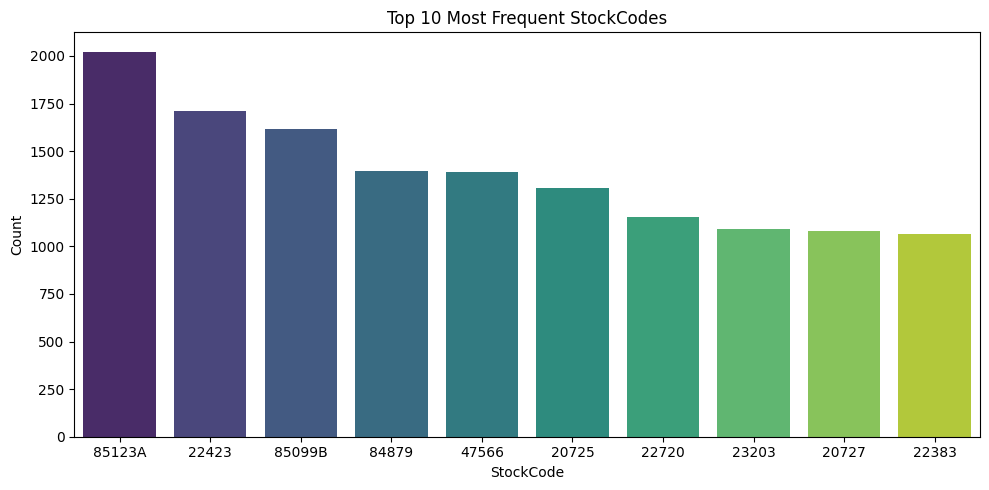

In [66]:
# top 10 most frequent stock codes
top_codes = df['StockCode'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_codes.index, y=top_codes.values, palette='viridis')
plt.title("Top 10 Most Frequent StockCodes")
plt.ylabel("Count")
plt.xlabel("StockCode")
plt.tight_layout()
plt.show()


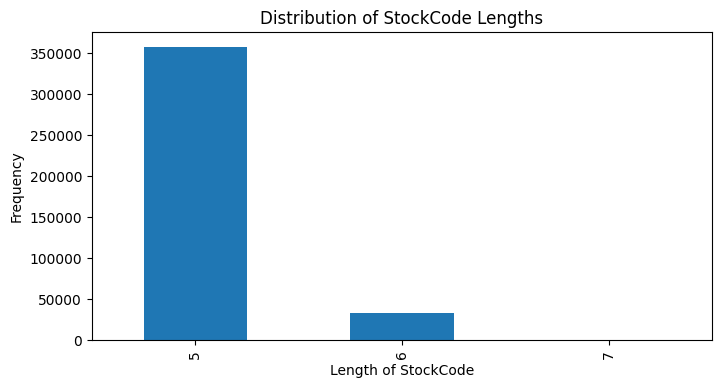

In [67]:
# stockcode length distribution
df['StockCodeLength'] = df['StockCode'].astype(str).apply(len)
df['StockCodeLength'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Distribution of StockCode Lengths")
plt.xlabel("Length of StockCode")
plt.ylabel("Frequency")
plt.show()


###  Univariate Analysis: StockCode

- Total Unique StockCodes: 3665
- Top frequent codes indicate bestselling products
- Non-numeric/Weird codes like 'M', 'POST', 'BANK CHARGES' found — (removed from data)
- Short-length codes may not represent physical products
- mostly codes are 5 (length)


## univariate analysis (description)

In [68]:
df['Description'].isnull().sum()

np.int64(0)

In [69]:
# lowercase conversion (consistency)
df['Description'] = df['Description'].str.lower()


In [70]:
df['Description'] = df['Description'].str.strip()

In [71]:
# top 20 most frequent products
top_products = df['Description'].value_counts().head(20)
print(top_products)

Description
white hanging heart t-light holder    2016
regency cakestand 3 tier              1713
jumbo bag red retrospot               1615
assorted colour bird ornament         1395
party bunting                         1389
lunch bag red retrospot               1303
set of 3 cake tins pantry design      1152
lunch bag  black skull.               1078
pack of 72 retrospot cake cases       1050
spotty bunting                        1014
paper chain kit 50's christmas        1003
lunch bag spaceboy design              993
heart of wicker small                  979
lunch bag cars blue                    977
natural slate heart chalkboard         972
lunch bag pink polkadot                941
lunch bag suki design                  915
rex cash+carry jumbo shopper           897
alarm clock bakelike red               886
jumbo bag pink polkadot                884
Name: count, dtype: int64


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_1232/2246338775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='crest')


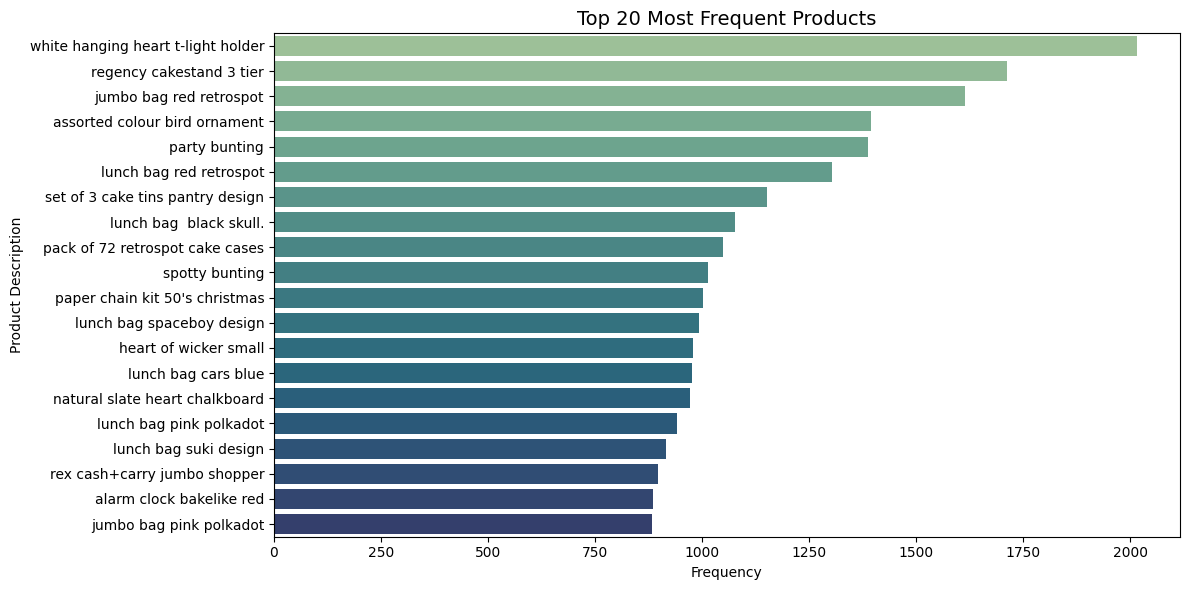

In [72]:
# visualtion plot for most common products

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='crest')
plt.title("Top 20 Most Frequent Products", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


In [73]:
# total unique products
print("Total Unique Products:", df['Description'].nunique())

Total Unique Products: 3860


In [74]:
# check for garbage data
# Unique descriptions with numeric/empty/short content
weird_desc = df[df['Description'].str.len() < 4]['Description'].unique()
print("Weird Descriptions (length < 4):", weird_desc)


Weird Descriptions (length < 4): []


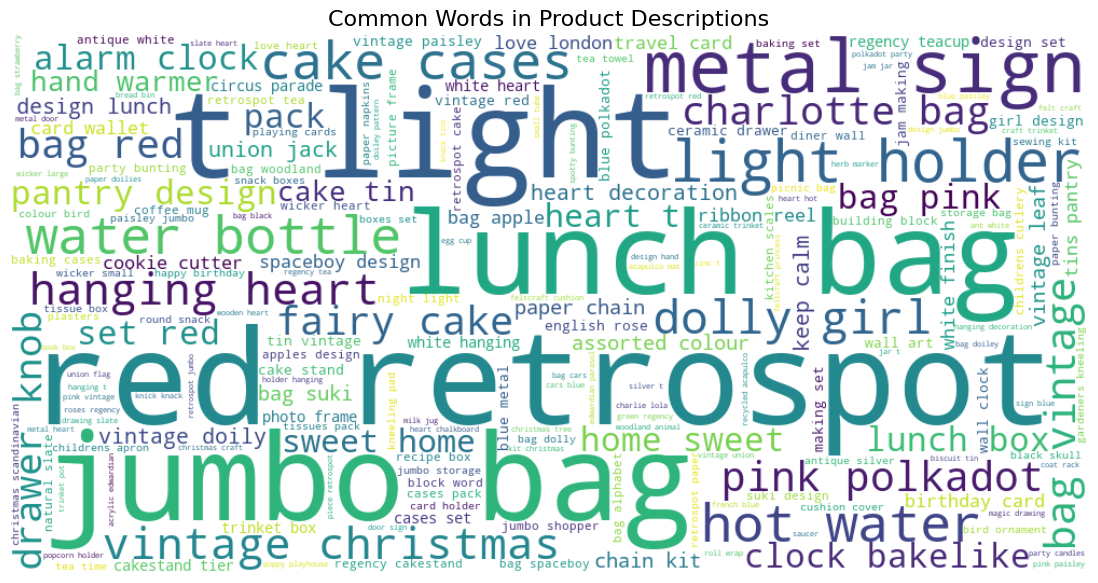

In [ ]:
# shows the most common words in description
from wordcloud import WordCloud

desc_text = " ".join(desc for desc in df['Description'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(desc_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Product Descriptions", fontsize=16)
plt.show()


### univariate analysis : description
- frequent keywords :  light , lunch , red , bag , retro etc..
- total no of unique products : 3860

## univariate analysis (quantity)

In [79]:
# summary of quantity
print("Summary Statistics for Quantity:\n")
print(df['Quantity'].describe())

Summary Statistics for Quantity:

count    391150.000000
mean         13.145300
std         180.807831
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


In [80]:
df['Quantity'].isnull().sum()

np.int64(0)

In [81]:
print("Total unique quantities:", df['Quantity'].nunique())
print("Top 10 most frequent quantities:\n", df['Quantity'].value_counts().head(10))

Total unique quantities: 299
Top 10 most frequent quantities:
 Quantity
1     68948
12    59811
2     57095
6     37423
4     31977
3     26607
24    23689
10    21155
8     11565
5      8036
Name: count, dtype: int64


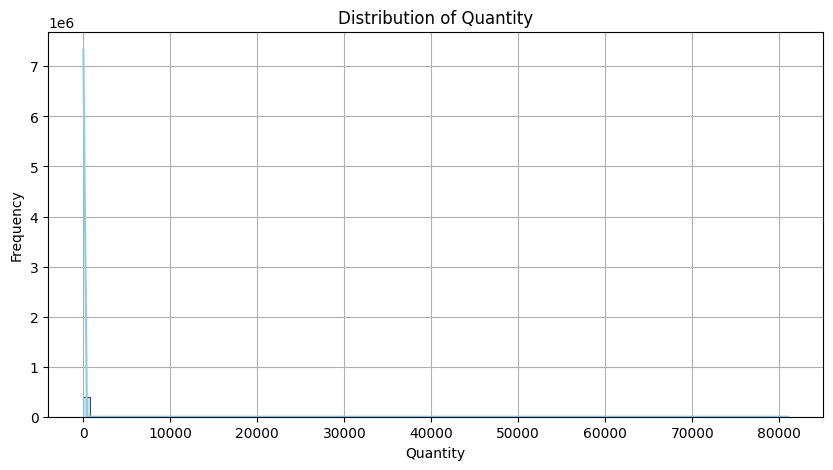

In [82]:
# distribution plot (quantity vs frequency)
plt.figure(figsize=(10,5))
sns.histplot(df['Quantity'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [84]:
# negative quantity check
negative_quantity = df[df['Quantity'] < 0]
print("Total negative quantity rows (returns):", len(negative_quantity))
display(negative_quantity.head())


Total negative quantity rows (returns): 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,StockCodeLength


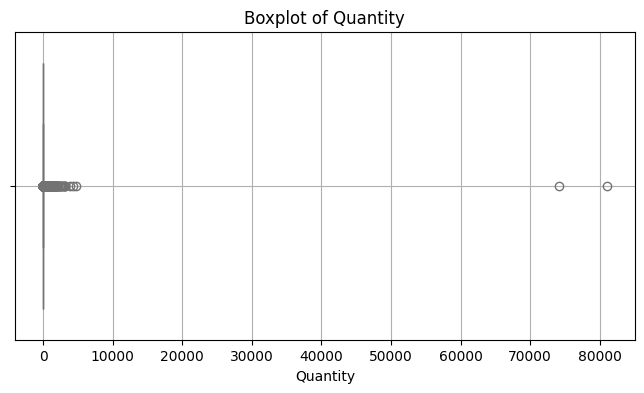

In [83]:
# box plot for outlier detection
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Quantity'], color='lightgreen')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.grid(True)
plt.show()

### univariate analysis : quantity
- mostly customers are retail (small quantity buyers)
- distribution shows some high quantity bulk buyers
- boxplot shows some outliers in quantity